## Description of dataset - 

### No information about data was given but I conducted my research online to better understand the dataset. Please see below my interpretation of the dataset. 

<p> We have been provided with GKG dataset which is a subset of GDELT (Global Database of Events, Language, and Tone) dataset which tracks global events like disasters, poltical events, news regarding labor events. Once the information is captured in form of texts from articles, online blogs, news webpages, NLP is applied for further analysis.  We have been provided with following columns deduced after application of NLP : </p>

<div class = "alert alert-warning">
    
    
* Date - The date on which an event happened 
*** 

* Dates - This column gives extra information about the dates present in the article. For example, a given value of year, day in  this column might mean that the article is referring to some event that happened on that day on that year. date_resolution just explains the level of precision for the dates that have been provided. <font color = green> Ex: if only date_resolution is given, the date_resolution = 1 </font>
 
*** 
    
* Source collection identifier - The value of this column is always 1. It simply means that the article might be collected from a given source or not
***
    
* Source common name - This represent the domain of the website from where the news/article has been taken from
***
    
* Document Identifier - Actual url of the article
*** 
    
* Counts - This columns gives information about count of something that has been talked about in the article. <font color = green> Ex: One of the rows tell about the count of an object being killed where the object were terrorists</font>
***
    
* Locations - This given information about geographic information talked about in the article. It is a dictionary with following keys:
    * Feature ID : Uniquely identifies a combination of city + state + country
        * <font color = green> Ex: Feature ID = 'UK' identifies UK whereas '-2601889' identifies London region of UK</font>
    * Adm1 Code - administrative code for 1st level subdivision (State)
    * Adm2 Code - administrative code for 2nd level subdivision (District)
*** 
    
* Organizations - Name of organizations mentioned in the article
***
    
* Themes - Gives information about salient themes being talked about in the article. Character offset tells the position in characters where the theme is talked about.
***
    
* Persons - Name of person/people being talked about in the article
    ***
* Tone - Gives information about the overall tone of the article
    * Positive Score - How many words with positive connotation are present in the article. A score is calculated based on that
    * Negative Score - How many words with negative connotation are present in the article. A score is calculated based on that
    * Polarity - Difference in magnitude of postive and negative score. <font color = green> High polarity means that the article has words having higher positive connotation </font>
    * Referenced Density - This tells how many words in the article are used to make a reference to some other word in that article
    * word count - Gives count of total words in that article
*** 

* Amount - Gives information about any amount type object being talked about in article. <font color = green> Ex: amount = 75, object = share, offset = 243 means that a share value of a stock is being talked about at 243rd position in text and the value of stock was 75 </font>
***

* Translation info - Null values
***

* Country - Country codes. 
    * Ex : <font color = green> IO = British Indian Territory, SB = Solomon Islands, TD = Portueguese Timor </font>
***

* Year - Gives year information

</div>

In [332]:
import numpy as np
import pandas as pd
import datetime as dt
import ast
import json

### Task1

Create a time series for the tone and frequency of every day between March 2018-August 2022 for labor theme attached.

* For instance, to compute the GKG-frequency-LABOR, you will be calculating number of times each word in the labor.txt occurs in every row of the themes column in the GKG data 
* To compute the GKG-tone-LABOR: divide the default GKG tone value by the GKG-frequency-LABOR obtained in (1).
The labor.txt, GKG_data, and sample output (toy dataset_labor) are attached

In [333]:
data = pd.read_csv('GKG_data_.csv')
data_original = data.copy()
data.head(10)

,gkgrecordid,date,sourcecollectionidentifier,sourcecommonname,documentidentifier,counts,locations,organizations,themes,persons,tone,dates,amounts,translationinfo,country,year
0,20150527221500-1855,2015-05-27 22:15:00.000,1,theatlantic.com,http://www.theatlantic.com/video/index/391937/...,NaN,"[{location_type=4, location_fullname=Saint-Pie...",NaN,"[{theme=TAX_FNCACT_INVENTOR, character_offset=...","[{person=Dominic Wilcox, character_offset=127}]","{tone=7.07070707070707, positive_score=9.09090...",NaN,NaN,NaN,SB,2015
1,20150515000000-497,2015-05-15 00:00:00.000,1,brisbanetimes.com.au,http://www.brisbanetimes.com.au/business/world...,NaN,"[{location_type=2, location_fullname=Texas, Un...","[{organization=Exchange Commission, character_...","[{theme=IDEOLOGY, character_offset=3599}, {the...","[{person=Trose Cox, character_offset=2758}, {p...","{tone=-1.83908045977011, positive_score=0.8045...","[{date_resolution=1, month=0, day=0, year=2012...","[{amount=75, object=a share, character_offset=...",NaN,IO,2015
2,20150515000000-2167,2015-05-15 00:00:00.000,1,smh.com.au,http://www.smh.com.au/business/world-business/...,NaN,"[{location_type=2, location_fullname=Texas, Un...","[{organization=Exchange Commission, character_...","[{theme=IDEOLOGY, character_offset=3599}, {the...","[{person=Trose Cox, character_offset=2758}, {p...","{tone=-1.83908045977011, positive_score=0.8045...","[{date_resolution=1, month=0, day=0, year=2012...","[{amount=75, object=a share, character_offset=...",NaN,IO,2015
3,20151113003000-1437,2015-11-13 00:30:00.000,1,thehindu.com,http://www.thehindu.com/news/national/tamil-na...,NaN,"[{location_type=5, location_fullname=Kerala, K...","[{organization=Southern Oceans Department, cha...","[{theme=TAX_ETHNICITY_INDIAN, character_offset...","[{person=Justin Antony, character_offset=388},...","{tone=-2.88461538461538, positive_score=1.4423...","[{date_resolution=4, month=10, day=6, year=0, ...",NaN,NaN,IO,2015
4,20151224041500-653,2015-12-24 04:15:00.000,1,eturbonews.com,http://www.eturbonews.com/67073/reunion-island...,NaN,"[{location_type=1, location_fullname=French, l...","[{organization=National Park House In La, char...","[{theme=WB_1777_FORESTS, character_offset=2050...",NaN,"{tone=2.78884462151394, positive_score=5.57768...","[{date_resolution=2, month=5, day=0, year=2001...","[{amount=650000000, object=people, character_o...",NaN,SB,2015
5,20220309021500-618,2022-03-09 02:15:00.000,1,southeastasiapost.com,https://www.southeastasiapost.com/news/2723705...,NaN,"[{location_type=1, location_fullname=Russia, l...","[{organization=African National Congress, char...","[{theme=WB_2433_CONFLICT_AND_VIOLENCE, charact...","[{person=Alexander Wendt, character_offset=264...","{tone=-3.61134995700774, positive_score=1.6337...","[{date_resolution=1, month=0, day=0, year=1992...","[{amount=54, object=countries, character_offse...",NaN,TP,2022
6,20150426154500-1651,2015-04-26 15:45:00.000,1,businessinsider.com.au,http://www.businessinsider.com.au/18-island-di...,NaN,"[{location_type=4, location_fullname=Itu Aba I...","[{organization=Korean Navy Handout, character_...","[{theme=TAX_FNCACT_TROOPS, character_offset=26...","[{person=Cross Reef, character_offset=5051}, {...","{tone=-2.08963431399505, positive_score=1.0173...","[{date_resolution=2, month=7, day=0, year=2005...","[{amount=2, object=governments released a join...",NaN,IO,2015
7,20220210074500-1027,2022-02-10 07:45:00.000,1,morningstar.com,https://www.morningstar.com/news/globe-newswir...,NaN,"[{location_type=1, location_fullname=Holy See,...","[{organization=Peace Federation, character_off...","[{theme=BAN, character_offset=880}, {theme=TAX...","[{person=Paula White-Cain, character_offset=30...","{tone=3.7147102526003, positive_score=4.160475...","[{date_resolution=1, month=0, day=0, year=2014...","[{amount=12, object=of world leaders, characte...",NaN,TP,2022
8,20220207133000-427,2022-02-07 13:30:00.000,1,ghanaweb.com,https://www.ghanaweb.com/GhanaHomePage/africa/...

In [334]:
data.shape

(100, 16)

<mark>**Original dataset had 106 rows. But pandas could read only 100 rows. On manual observation, I came to know that those 6 rows had formatting isues because of which it cant be read by Pandas. The value of location cell was distributed across different columns (even beyond 16th column). But on checking, it turned out that none of those rows had non null values for columns like tone, theme, date. So we can ignore those rows**</mark>

<mark>**Another interesting observation was that in these 6 rows, there are some rows which contain words from labor txt file. But for such rows, although information for other columns were given but no info was given on date column. So we cant deduce the date for these rows. But on checking year column the value for such rows were 2015. So we won't be missing out much by leaving these rows as they dont fall  in our 2018-2022 year range**</mark>

#### There are null values in many columns but first we will extract necessary columns for task1 and then see if any cleaning is required

In [335]:
data = data[['date','themes','tone']]

In [336]:
data

,date,themes,tone
0,2015-05-27 22:15:00.000,"[{theme=TAX_FNCACT_INVENTOR, character_offset=...","{tone=7.07070707070707, positive_score=9.09090..."
1,2015-05-15 00:00:00.000,"[{theme=IDEOLOGY, character_offset=3599}, {the...","{tone=-1.83908045977011, positive_score=0.8045..."
2,2015-05-15 00:00:00.000,"[{theme=IDEOLOGY, character_offset=3599}, {the...","{tone=-1.83908045977011, positive_score=0.8045..."
3,2015-11-13 00:30:00.000,"[{theme=TAX_ETHNICITY_INDIAN, character_offset...","{tone=-2.88461538461538, positive_score=1.4423..."
4,2015-12-24 04:15:00.000,"[{theme=WB_1777_FORESTS, character_offset=2050...","{tone=2.78884462151394, positive_score=5.57768..."
...,...,...,...
95,2022-06-13 08:15:00.000,NaN,"{tone=1, positive_score=4, negative_score=3, p..."
96,2022-06-13 16:00:00.000,NaN,"{tone=2.34741784037559, positive_score=5.39906..."
97,2022-06-13 08:15:00.000,NaN,"{tone=0.810810810810811, positive_score=4.3243..."
98,2022-06-15 16:00:00.000,"[{theme=AGRICULTURE, character_offset=388}, {t...","{tone=4.30416068866571, positive_score=5.59540..."


In [337]:
data['date']  = pd.to_datetime(data['date'])
data['date']

0    2015-05-27 22:15:00
1    2015-05-15 00:00:00
2    2015-05-15 00:00:00
3    2015-11-13 00:30:00
4    2015-12-24 04:15:00
             ...        
95   2022-06-13 08:15:00
96   2022-06-13 16:00:00
97   2022-06-13 08:15:00
98   2022-06-15 16:00:00
99   2022-06-03 08:15:00
Name: date, Length: 100, dtype: datetime64[ns]

In [338]:
data = data.sort_values(by = 'date')

### original dataset has date ranging from 24-Feb-2015  to 28-June-2022

In [339]:
data.head()

,date,themes,tone
64,2015-02-24 00:15:00,NaN,"{tone=2.61096605744125, positive_score=3.13315..."
70,2015-03-13 01:45:00,"[{theme=IDEOLOGY, character_offset=744}, {them...","{tone=-5.45571245186136, positive_score=2.2464..."
6,2015-04-26 15:45:00,"[{theme=TAX_FNCACT_TROOPS, character_offset=26...","{tone=-2.08963431399505, positive_score=1.0173..."
72,2015-05-14 21:00:00,"[{theme=ECON_STOCKMARKET, character_offset=173...","{tone=-1.53256704980843, positive_score=0.5747..."
71,2015-05-14 21:00:00,"[{theme=ECON_STOCKMARKET, character_offset=166...","{tone=-1.38888888888889, positive_score=0.5952..."


### Extract all rows between Mar 2018 - Aug 2022

In [340]:
data_filtered = data[(data['date'] >= pd.to_datetime('2018-03-01'))  & (data['date'] <= pd.to_datetime('2022-08-31'))]
data_filtered
# 54 rows

,date,themes,tone
52,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199..."
51,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199..."
90,2022-01-12 19:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951..."
68,2022-01-12 20:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951..."
9,2022-01-13 11:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-2.33644859813084, positive_score=1.4018..."
53,2022-01-24 23:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-1.18577075098814, positive_score=2.3715..."
92,2022-01-26 00:30:00,"[{theme=TOURISM, character_offset=150}, {theme...","{tone=5.88235294117647, positive_score=5.88235..."
8,2022-02-07 13:30:00,"[{theme=TAX_ETHNICITY_ENGLISH, character_offse...","{tone=1.07192254495159, positive_score=3.31950..."
7,2022-02-10 07:45:00,"[{theme=BAN, character_offset=880}, {theme=TAX...","{tone=3.7147102526003, positive_score=4.160475..."
67,2022-02-24 19:45:00,"[{theme=TAX_FNCACT_COOKS, character_offset=122...","{tone=2.68156424581006, positive_score=3.57541..."


### Since the data given only has years either in 2015 or 2022 (no data for 2018), we are essentially going to create time series from 10-Jan-2022 to 28-June-2022

#### Now that we have rows in necessaary date range, lets see null value count

In [341]:
data.isnull().sum()
# Themes has null in 29 rows

date       0
themes    29
tone       0
dtype: int64

In [342]:
data_original[data_original['themes'].isnull()]['sourcecommonname'].value_counts()

goal.com                   18
allafrica.com               2
msn.com                     2
dailypost.ng                2
thenationonlineng.net       1
punchng.com                 1
ahram.org.eg                1
medafricatimes.com          1
digitalsignagetoday.com     1
Name: sourcecommonname, dtype: int64

<mark>**I did a manual observation for all the rows where source common name was from the above list. A lot of these sources have themes representing Football and Eagles game. So it is safe to drop these rows. There are no other alternatives of substituting themes as no other column in the dataset has relevant information for substitution. But our analysis makes sure we are not loosing out on much frequency counts**</mark>

### Reading down themes from labor.txt

In [343]:
with open('labor.txt','r') as labor_file:
    words = labor_file.read().split()
words = [i.strip('""') for i in words]


## Extracting themes from each row for comparison with labor.txt file

#### As discussed above, due to shortage of any relevant column for substitution of theme, we will drop rows where themes are null

In [344]:
data_filtered = data_filtered.dropna(subset = ['themes','tone'])

In [345]:
data_filtered

,date,themes,tone
52,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199..."
51,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199..."
90,2022-01-12 19:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951..."
68,2022-01-12 20:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951..."
9,2022-01-13 11:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-2.33644859813084, positive_score=1.4018..."
53,2022-01-24 23:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-1.18577075098814, positive_score=2.3715..."
92,2022-01-26 00:30:00,"[{theme=TOURISM, character_offset=150}, {theme...","{tone=5.88235294117647, positive_score=5.88235..."
8,2022-02-07 13:30:00,"[{theme=TAX_ETHNICITY_ENGLISH, character_offse...","{tone=1.07192254495159, positive_score=3.31950..."
7,2022-02-10 07:45:00,"[{theme=BAN, character_offset=880}, {theme=TAX...","{tone=3.7147102526003, positive_score=4.160475..."
67,2022-02-24 19:45:00,"[{theme=TAX_FNCACT_COOKS, character_offset=122...","{tone=2.68156424581006, positive_score=3.57541..."


In [347]:
data_filtered.shape
# We are left with 26 essential rows

(26, 3)

In [189]:
data_filtered['theme_extracted'] = ""


C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\1797978320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['theme_extracted'] = ""


In [348]:
#extract themes for each row and check how many times does each row contain that theme

def theme(strs):
    strs_corrected = strs.replace("=",":").replace("theme",'"theme"').replace("character_offset",'"character_offset"').lower()
    lst = strs_corrected.strip('][').split(', ')
    themes = []
    for i in lst:
        themes.append(i.split(':')[1])
    return themes[0::2]


data_filtered['theme_extracted'] = data_filtered['themes'].apply(theme)




C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\3653644026.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['theme_extracted'] = data_filtered['themes'].apply(theme)


In [349]:
data_filtered['theme_extracted']

52    [econ_developmentorgs_world_bank, econ_develop...
51    [econ_developmentorgs_world_bank, econ_develop...
90    [general_government, epu_policy_government, ta...
68    [general_government, epu_policy_government, ta...
9     [tax_worldlanguages_comoros, econ_debt, wb_110...
53    [tax_worldlanguages_comoros, negotiations, wb_...
92    [tourism, tourism, tourism, wb_825_tourism, wb...
8     [tax_ethnicity_english, tax_fncact_foreign_min...
7     [ban, tax_fncact_vice_president, tax_fncact_vi...
67    [tax_fncact_cooks, crisislex_t11_updatessympat...
55    [manmade_disaster_implied, tax_fncact_secretar...
21    [manmade_disaster_implied, tax_fncact_secretar...
20    [tax_worldlanguages_timor, wb_1751_liquefied_n...
5     [wb_2433_conflict_and_violence, wb_2432_fragil...
69    [tax_ethnicity_indian, wb_775_trade_policy_and...
16    [tax_fncact_deputy, general_government, genera...
14    [tax_fncact_deputy, general_government, genera...
17    [tax_fncact_deputy, general_government, ge

In [350]:
data_filtered['frequency'] = 0

C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\3677490694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['frequency'] = 0


In [351]:
def freq_count(word_list):
    for i, row in data_filtered.iterrows():
        c = 0
        for word in word_list:
            try:
                if word in row['theme_extracted']:
                    c += 1
            except Exception as e:
                print(e)
                print(word)
                print(data_filtered['theme_extracted'].iloc[i])
        data_filtered.at[i, 'frequency'] = c

In [352]:
freq_count(words)

In [353]:
data_filtered

,date,themes,tone,theme_extracted,frequency
52,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199...","[econ_developmentorgs_world_bank, econ_develop...",7
51,2022-01-10 20:15:00,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199...","[econ_developmentorgs_world_bank, econ_develop...",7
90,2022-01-12 19:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951...","[general_government, epu_policy_government, ta...",0
68,2022-01-12 20:00:00,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951...","[general_government, epu_policy_government, ta...",0
9,2022-01-13 11:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-2.33644859813084, positive_score=1.4018...","[tax_worldlanguages_comoros, econ_debt, wb_110...",0
53,2022-01-24 23:15:00,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-1.18577075098814, positive_score=2.3715...","[tax_worldlanguages_comoros, negotiations, wb_...",0
92,2022-01-26 00:30:00,"[{theme=TOURISM, character_offset=150}, {theme...","{tone=5.88235294117647, positive_score=5.88235...","[tourism, tourism, tourism, wb_825_tourism, wb...",0
8,2022-02-07 13:30:00,"[{theme=TAX_ETHNICITY_ENGLISH, character_offse...","{tone=1.07192254495159, positive_score=3.31950...","[tax_ethnicity_english, tax_fncact_foreign_min...",0
7,2022-02-10 07:45:00,"[{theme=BAN, character_offset=880}, {theme=TAX...","{tone=3.7147102526003, positive_score=4.160475...","[ban, tax_fncact_vice_president, tax_fncact_vi...",0
67,2022-02-24 19:45:00,"[{theme=TAX_FNCACT_COOKS, character_offset=122...","{tone=2.68156424581006, positive_score=3.57541...","[tax_fncact_cooks, crisislex_t11_updatessympat...",2


### There are multiple rows where date is same. This means that data is given for multiple articles/ texts on same day. We need to add frequency for rows with same date as they will collectively demonstrate the sentiment for labor theme on that day

### On observation though it looks like most of the rows are repeated. We will sum the frequencies but average out the tone

### There are instances where dates are same but time is different. So we first extract the dates and then perform groupby

In [196]:
data_filtered['date'] = data_filtered['date'].dt.date

C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\3417564541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = data_filtered['date'].dt.date


In [199]:
data_filtered

,date,themes,tone,year,month,day,theme_extracted,frequency
52,2022-01-10,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199...",2022,1,10,"[econ_developmentorgs_world_bank, econ_develop...",7
51,2022-01-10,"[{theme=ECON_DEVELOPMENTORGS_WORLD_BANK, chara...","{tone=-0.761421319796954, positive_score=2.199...",2022,1,10,"[econ_developmentorgs_world_bank, econ_develop...",7
90,2022-01-12,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951...",2022,1,12,"[general_government, epu_policy_government, ta...",0
68,2022-01-12,"[{theme=GENERAL_GOVERNMENT, character_offset=1...","{tone=-2.4390243902439, positive_score=1.21951...",2022,1,12,"[general_government, epu_policy_government, ta...",0
9,2022-01-13,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-2.33644859813084, positive_score=1.4018...",2022,1,13,"[tax_worldlanguages_comoros, econ_debt, wb_110...",0
53,2022-01-24,"[{theme=TAX_WORLDLANGUAGES_COMOROS, character_...","{tone=-1.18577075098814, positive_score=2.3715...",2022,1,24,"[tax_worldlanguages_comoros, negotiations, wb_...",0
92,2022-01-26,"[{theme=TOURISM, character_offset=150}, {theme...","{tone=5.88235294117647, positive_score=5.88235...",2022,1,26,"[tourism, tourism, tourism, wb_825_tourism, wb...",0
8,2022-02-07,"[{theme=TAX_ETHNICITY_ENGLISH, character_offse...","{tone=1.07192254495159, positive_score=3.31950...",2022,2,7,"[tax_ethnicity_english, tax_fncact_foreign_min...",0
7,2022-02-10,"[{theme=BAN, character_offset=880}, {theme=TAX...","{tone=3.7147102526003, positive_score=4.160475...",2022,2,10,"[ban, tax_fncact_vice_president, tax_fncact_vi...",0
67,2022-02-24,"[{theme=TAX_FNCACT_COOKS, character_offset=122...","{tone=2.68156424581006, positive_score=3.57541...",2022,2,24,"[tax_fncact_cooks, crisislex_t11_updatessympat...",2


In [202]:
data_filtered2 = data_filtered.groupby("date")['frequency'].sum().reset_index(name = 'frequency')

In [203]:
data_filtered2

,date,frequency
0,2022-01-10,14
1,2022-01-12,0
2,2022-01-13,0
3,2022-01-24,0
4,2022-01-26,0
5,2022-02-07,0
6,2022-02-10,0
7,2022-02-24,2
8,2022-03-06,4
9,2022-03-09,2


### Finding out gkg tone. For this first we need to extract default tone for each row

In [204]:
data_filtered['tone_extracted'] = ""

def tone(tone_strs):
    tone_strs_corrected = tone_strs.replace("=",":").replace("tone",'"tone"').replace("positive_score",'"positive_score"').replace("negative_score",'"negative_score"').replace("polarity",'"polarity"').replace("activity_reference_density",'"activity_reference_density"').replace("self_group_reference_density",'"self_group_reference_density"').replace("word_count",'"word_count"').lower()
    tone_lst = tone_strs_corrected.strip('][').split(', ')
    return ast.literal_eval(tone_lst[0].split(":")[1])



data_filtered['tone_extracted'] = data_filtered['tone'].apply(tone)

C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\1770620481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tone_extracted'] = ""
C:\Users\yasha\AppData\Local\Temp\ipykernel_43548\1770620481.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['tone_extracted'] = data_filtered['tone'].apply(tone)


### We used sum for frequency, but we take avg for tone

In [216]:
data_filtered2['tone_extracted'] = data_filtered.groupby("date")['tone_extracted'].mean().reset_index(name = 'tone_extracted')['tone_extracted']

In [217]:
data_filtered2

,date,frequency,tone_extracted
0,2022-01-10,14,-0.761421
1,2022-01-12,0,-2.439024
2,2022-01-13,0,-2.336449
3,2022-01-24,0,-1.185771
4,2022-01-26,0,5.882353
5,2022-02-07,0,1.071923
6,2022-02-10,0,3.714710
7,2022-02-24,2,2.681564
8,2022-03-06,4,2.078483
9,2022-03-09,2,-3.611350


<p> Tone_extracted in the above dataframe represents the default tone for each row.

### Calculating GKG tone by dividing tone with calculated GKG Frequency

In [218]:
data_filtered2['tone_calculated'] = data_filtered2['tone_extracted']/data_filtered2['frequency']

<mark>**For some rows, the frequency was already zero. It means for that date, none of the text articles talked about themes that resonated with labor. So caclulating GKG tone would lead to infinity or - inifinity because our denominator had zero. We need to replace such values with 0 as GKG TONE = 0 would imply the tone/sentiment revolving around labor in news articles that day was zero**</mark>

### replacing inf (divide by zero) with 0

In [219]:
data_filtered2['tone_calculated'] =  data_filtered2['tone_calculated'].replace([np.inf,-np.inf],0)

In [220]:
data_filtered2

,date,frequency,tone_extracted,tone_calculated
0,2022-01-10,14,-0.761421,-0.054387
1,2022-01-12,0,-2.439024,0.000000
2,2022-01-13,0,-2.336449,0.000000
3,2022-01-24,0,-1.185771,0.000000
4,2022-01-26,0,5.882353,0.000000
5,2022-02-07,0,1.071923,0.000000
6,2022-02-10,0,3.714710,0.000000
7,2022-02-24,2,2.681564,1.340782
8,2022-03-06,4,2.078483,0.519621
9,2022-03-09,2,-3.611350,-1.805675


In [224]:
result = data_filtered2[['date','frequency','tone_calculated']]
result.columns = ['date','GKG Frequency','GKG Tone']
result

,date,GKG Frequency,GKG Tone
0,2022-01-10,14,-0.054387
1,2022-01-12,0,0.000000
2,2022-01-13,0,0.000000
3,2022-01-24,0,0.000000
4,2022-01-26,0,0.000000
5,2022-02-07,0,0.000000
6,2022-02-10,0,0.000000
7,2022-02-24,2,1.340782
8,2022-03-06,4,0.519621
9,2022-03-09,2,-1.805675


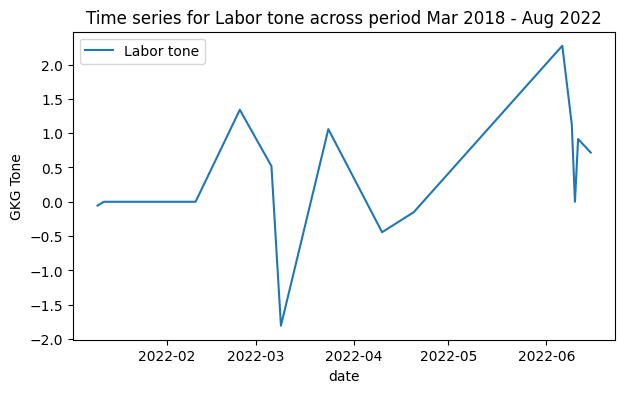

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (7,4))
sns.lineplot(data = result,x = 'date',y = 'GKG Tone', label = 'Labor tone')
plt.title("Time series for Labor tone across period Mar 2018 - Aug 2022")
plt.legend()

### The plot represents how the labor tone was throughout the given time period. It is not the most accurate representation of the period as I didn't have any data for year 2018-2021. But with the given data, i can say that labor tone is mostly positive except few sudden drops where something extreme negative event might have occured on that day

# TASK 2

## Task2 part a

* The first task is to put the tone values in each row into a dataframe as shown below:

In [232]:
data2 = pd.read_csv('GKG_data_.csv')
data2

,gkgrecordid,date,sourcecollectionidentifier,sourcecommonname,documentidentifier,counts,locations,organizations,themes,persons,tone,dates,amounts,translationinfo,country,year
0,20150527221500-1855,2015-05-27 22:15:00.000,1,theatlantic.com,http://www.theatlantic.com/video/index/391937/...,NaN,"[{location_type=4, location_fullname=Saint-Pie...",NaN,"[{theme=TAX_FNCACT_INVENTOR, character_offset=...","[{person=Dominic Wilcox, character_offset=127}]","{tone=7.07070707070707, positive_score=9.09090...",NaN,NaN,NaN,SB,2015
1,20150515000000-497,2015-05-15 00:00:00.000,1,brisbanetimes.com.au,http://www.brisbanetimes.com.au/business/world...,NaN,"[{location_type=2, location_fullname=Texas, Un...","[{organization=Exchange Commission, character_...","[{theme=IDEOLOGY, character_offset=3599}, {the...","[{person=Trose Cox, character_offset=2758}, {p...","{tone=-1.83908045977011, positive_score=0.8045...","[{date_resolution=1, month=0, day=0, year=2012...","[{amount=75, object=a share, character_offset=...",NaN,IO,2015
2,20150515000000-2167,2015-05-15 00:00:00.000,1,smh.com.au,http://www.smh.com.au/business/world-business/...,NaN,"[{location_type=2, location_fullname=Texas, Un...","[{organization=Exchange Commission, character_...","[{theme=IDEOLOGY, character_offset=3599}, {the...","[{person=Trose Cox, character_offset=2758}, {p...","{tone=-1.83908045977011, positive_score=0.8045...","[{date_resolution=1, month=0, day=0, year=2012...","[{amount=75, object=a share, character_offset=...",NaN,IO,2015
3,20151113003000-1437,2015-11-13 00:30:00.000,1,thehindu.com,http://www.thehindu.com/news/national/tamil-na...,NaN,"[{location_type=5, location_fullname=Kerala, K...","[{organization=Southern Oceans Department, cha...","[{theme=TAX_ETHNICITY_INDIAN, character_offset...","[{person=Justin Antony, character_offset=388},...","{tone=-2.88461538461538, positive_score=1.4423...","[{date_resolution=4, month=10, day=6, year=0, ...",NaN,NaN,IO,2015
4,20151224041500-653,2015-12-24 04:15:00.000,1,eturbonews.com,http://www.eturbonews.com/67073/reunion-island...,NaN,"[{location_type=1, location_fullname=French, l...","[{organization=National Park House In La, char...","[{theme=WB_1777_FORESTS, character_offset=2050...",NaN,"{tone=2.78884462151394, positive_score=5.57768...","[{date_resolution=2, month=5, day=0, year=2001...","[{amount=650000000, object=people, character_o...",NaN,SB,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20220613081500-107,2022-06-13 08:15:00.000,1,msn.com,https://www.msn.com/en-xl/africa/other/super-e...,NaN,"[{location_type=1, location_fullname=Sierra Le...",NaN,NaN,"[{person=Sylvanus Okpala, character_offset=1417}]","{tone=1, positive_score=4, negative_score=3, p...","[{date_resolution=1, month=0, day=0, year=1994...","[{amount=2, object=fixture of Group A, charact...",NaN,TP,2022
96,20220613160000-1341,2022-06-13 16:00:00.000,1,goal.com,https://www.goal.com/en/news/sao-tome-and-prin...,NaN,"[{location_type=1, location_fullname=Nigeria, ...",NaN,NaN,"[{person=Emmanuel Dennis, character_offset=293...","{tone=2.34741784037559, positive_score=5.39906...","[{date_resolution=4, month=6, day=9, year=0, o...","[{amount=4, object=goals while Dennis netted, ...",NaN,TP,2022
97,20220613081500-450,2022-06-13 08:15:00.000,1,goal.com,https://www.goal.com/en-om/news/2023-afcon-qua...,NaN,"[{location_type=1, location_fullname=Nigeria, ...",NaN,NaN,"[{person=Kenneth Omeruo, character_offset=586}...","{tone=0.810810810810811, positive_score=4.3243...",NaN,NaN,NaN,TP,2022
98,20220615160000-993,2022-06-15 16:00:00.000,1,opportunitiesforafricans.com,https://www.opportunitiesforafricans.com/owsd-...,NaN,"[{location_type=1, location_fullname=Lesotho, ...","[{organization=Mathematical Sciences, characte...","[{theme=AGRICULTURE, character_offset=388}, {t...",NaN,"{tone=4.30416068866571, positive_score=5.59540...",NaN,"[{amount=5, object=of the last 15, character_o...",NaN,TP,2022


In [267]:
## creating tone dataframe
# we will create a dataframe with columns as keys of dictionary and data as values of dictionary
# But we also need to parse the tone series as they are strings initially
keys = ast.literal_eval(data2['tone'].iloc[0].replace("=",":").replace("tone",'"tone"').replace("positive_score",'"positive_score"').replace("negative_score",'"negative_score"').replace("polarity",'"polarity"').replace("activity_reference_density",'"activity_reference_density"').replace("self_group_reference_density",'"self_group_reference_density"').replace("word_count",'"word_count"')).keys()

In [275]:
lst = []
for i in data2['tone']:
    lst.append(ast.literal_eval(i.replace("=",":").replace("tone",'"tone"').replace("positive_score",'"positive_score"').replace("negative_score",'"negative_score"').replace("polarity",'"polarity"').replace("activity_reference_density",'"activity_reference_density"').replace("self_group_reference_density",'"self_group_reference_density"').replace("word_count",'"word_count"')))

In [278]:
result1 = pd.DataFrame(data = lst,columns = keys)
result1

,tone,positive_score,negative_score,polarity,activity_reference_density,self_group_reference_density,word_count
0,7.070707,9.090909,2.020202,11.111111,16.161616,2.020202,94
1,-1.839080,0.804598,2.643678,3.448276,23.448276,0.689655,810
2,-1.839080,0.804598,2.643678,3.448276,23.448276,0.689655,810
3,-2.884615,1.442308,4.326923,5.769231,16.346154,0.000000,191
4,2.788845,5.577689,2.788845,8.366534,21.314741,0.000000,437
...,...,...,...,...,...,...,...
95,1.000000,4.000000,3.000000,7.000000,22.000000,1.333333,260
96,2.347418,5.399061,3.051643,8.450704,23.474178,0.000000,396
97,0.810811,4.324324,3.513514,7.837838,24.324324,4.594595,340
98,4.304161,5.595409,1.291248,6.886657,17.934003,0.430416,590


### Task2 part b
* The date column contains both date and time together. The second task is to split the date
column into two new columns. The first column should be titled “date”, while the second column will be
“time”. The values of the new date column will contain date only in this format 2015-Feb. The values of
the new time column will be in this format 22:15:00.

In [292]:
result2 = pd.DataFrame()

result2['date'] = pd.to_datetime(data2['date']).dt.strftime('%Y-%b')
result2['time'] = pd.to_datetime(data2['date']).dt.time
result2

,date,time
0,2015-May,22:15:00
1,2015-May,00:00:00
2,2015-May,00:00:00
3,2015-Nov,00:30:00
4,2015-Dec,04:15:00
...,...,...
95,2022-Jun,08:15:00
96,2022-Jun,16:00:00
97,2022-Jun,08:15:00
98,2022-Jun,16:00:00
